In [245]:
using Revise
using BiMDPs


In [246]:
dir = "case005"

"case005"

In [247]:
rgw = case_dictionary[dir]

BiMDPs.RoverWorld.RoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles: Array{Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}((433,))
  exit_xys: Array{Tuple{Int64, Int64}}((1,))


## Plot rewards grid

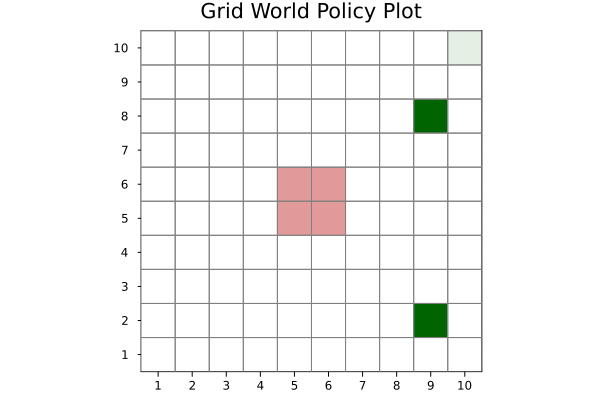

In [227]:
RoverWorld.plot_grid_world(rgw)

In [228]:
RoverWorld.create_reward_field_evolution_gif(rgw; dir=dir)

"case005/reward_evolution.gif"

## Solving

In [229]:
@time policy = RoverWorld.solve_using("vi", rgw, vi_max_iterations = 500);

  1.770921 seconds (30.29 M allocations: 2.146 GiB, 12.23% gc time)


In [230]:
@time q_learning_policy = RoverWorld.solve_using("qlearning", rgw, q_n_episodes=50000);

  3.869856 seconds (69.21 M allocations: 4.849 GiB, 13.03% gc time)


In [231]:
@time sarsa_policy = RoverWorld.solve_using("sarsa", rgw, sarsa_n_episodes=50000);

  3.780979 seconds (68.66 M allocations: 4.820 GiB, 13.18% gc time)


## Compare different policies

In [232]:
results = RoverWorld.run_simulation(rgw, policy, q_learning_policy, sarsa_policy; N_sim = 500);

N_sim = 500
window = 166


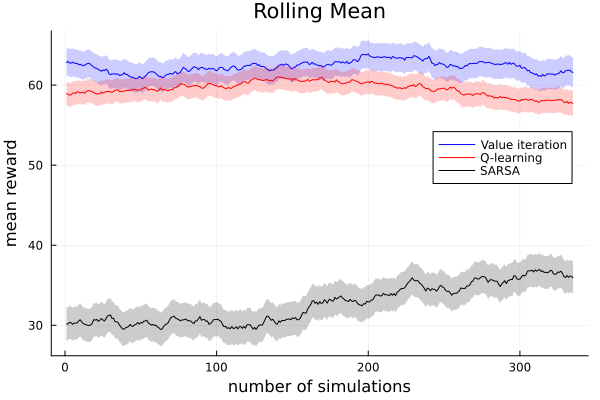

In [233]:
plt = RoverWorld.plot_simulation_results(results; dir = dir, fname = "discountedrewards_hightraining")

## Get undiscounted rewards

In [234]:
rgw_nodisc = RoverWorld.modify_γ(rgw, γ=1.0)

BiMDPs.RoverWorld.RoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 1.0
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles: Array{Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}((433,))
  exit_xys: Array{Tuple{Int64, Int64}}((1,))


In [235]:
results = RoverWorld.run_simulation(rgw_nodisc, policy, q_learning_policy, sarsa_policy; N_sim = 500);

N_sim = 500
window = 166


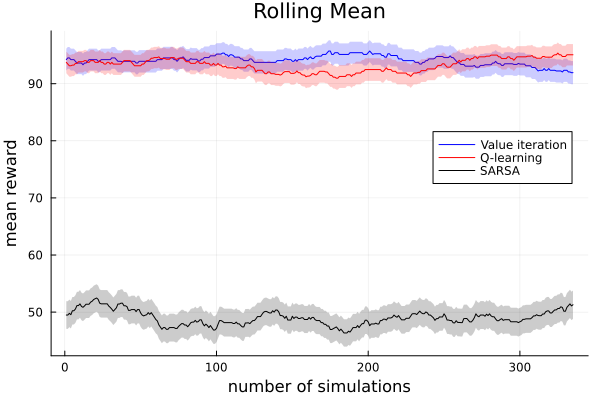

In [236]:
plt = RoverWorld.plot_simulation_results(results; dir = dir, fname = "undiscountedrewards_hightraining")

## Computation time vs optimality

In [237]:
results = RoverWorld.optimality_vs_compute(rgw, [("vi", [1, 5, 50, 100, 150], 500), ("qlearning", [50,50000], 500), ("sarsa", [50,50000], 500)])

Comp_time of vi after 1 iterations: 0.1086902
Reward of vi after 500 simulations: μ = 0.31583535158975906, σ = 19.70355955586859
Comp_time of vi after 5 iterations: 0.4401562
Reward of vi after 500 simulations: μ = 32.65871860822133, σ = 33.66542578257176
Comp_time of vi after 50 iterations: 1.7186418
Reward of vi after 500 simulations: μ = 62.66545279004873, σ = 18.33737508157834
Comp_time of vi after 100 iterations: 1.758688
Reward of vi after 500 simulations: μ = 62.58734158466729, σ = 18.6151877329185
Comp_time of vi after 150 iterations: 1.6910101
Reward of vi after 500 simulations: μ = 62.818464731661166, σ = 17.94360950360342
Comp_time of qlearning after 50 iterations: 0.0038797
Reward of qlearning after 500 simulations: μ = -2.0069333721632567, σ = 21.139857302730295
Comp_time of qlearning after 50000 iterations: 3.7638212
Reward of qlearning after 500 simulations: μ = 58.24862021051666, σ = 14.90200899695506
Comp_time of sarsa after 50 iterations: 0.0088065
Reward of sarsa aft

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 3 entries:
  "vi"        => ([0.10869, 0.440156, 1.71864, 1.75869, 1.69101], [0.315835, 32…
  "sarsa"     => ([0.0088065, 3.78148], [-2.85711, 33.5773], [24.7874, 27.0045])
  "qlearning" => ([0.0038797, 3.76382], [-2.00693, 58.2486], [21.1399, 14.902])

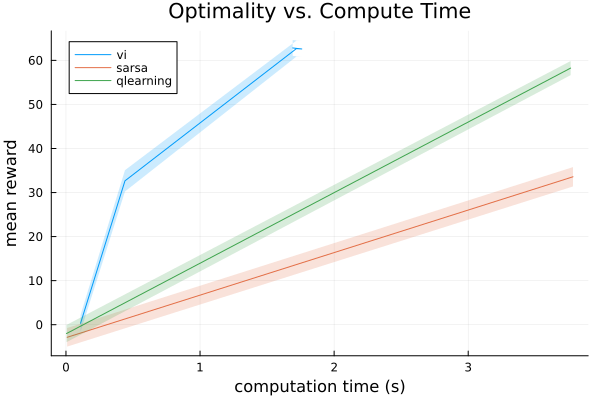

In [238]:
RoverWorld.plot_optimality_vs_compute(results, dir = dir)

## View stepthrough of one policy

In [239]:
s0 = RoverWorld.State(6,7,1,fill(false, length(rgw.tgts)))
steps = RoverWorld.collect_stepthrough(rgw, policy, init_state = s0)

20-element Vector{Any}:
 (s = BiMDPs.RoverWorld.State(6, 7, 1, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.UP, r = 0)
 (s = BiMDPs.RoverWorld.State(6, 8, 2, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(7, 8, 3, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(8, 8, 4, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(9, 8, 5, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.DOWN, r = 50.0)
 (s = BiMDPs.RoverWorld.State(9, 7, 6, Bool[0, 1, 0]), a = BiMDPs.RoverWorld.DOWN, r = 0)
 (s = BiMDPs.RoverWorld.State(9, 6, 7, Bool[0, 1, 0]), a = BiMDPs.RoverWorld.DOWN, r = 0)
 (s = BiMDPs.RoverWorld.State(9, 5, 8, Bool[0, 1, 0]), a = BiMDPs.RoverWorld.DOWN, r = 0)
 (s = BiMDPs.RoverWorld.State(9, 4, 9, Bool[0, 1, 0]), a = BiMDPs.RoverWorld.DOWN, r = 0)
 (s = BiMDPs.RoverWorld.State(9, 3, 10, Bool[0, 1, 0]), a = BiMDPs.RoverWorld.DOWN, r = 0)
 (s = BiMDPs.RoverWorld.State(9, 2, 11, Bool[0, 1, 0]), a = BiMDPs.Rove

In [240]:
file_path = RoverWorld.create_simulated_episode_gif(rgw, policy, steps, dir=dir, fname="stepthrough_eg_1")

"case005/stepthrough_eg_1.gif"

In [241]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 105.0.


## Another example

In [242]:
s0 = RoverWorld.State(1,9,1,fill(false, length(rgw.tgts)))
steps = RoverWorld.collect_stepthrough(rgw, policy, init_state = s0)

13-element Vector{Any}:
 (s = BiMDPs.RoverWorld.State(1, 9, 1, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.DOWN, r = 0)
 (s = BiMDPs.RoverWorld.State(1, 8, 2, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(2, 8, 3, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(3, 8, 4, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(4, 8, 5, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(5, 8, 6, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(6, 8, 7, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(7, 8, 8, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(8, 8, 9, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.RIGHT, r = 0)
 (s = BiMDPs.RoverWorld.State(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.RoverWorld.UP, r = 50.0)
 (s = BiMDPs.RoverWorld.State(9, 9, 11, Bool[0, 1, 0]), a = BiMDPs

In [243]:
file_path = RoverWorld.create_simulated_episode_gif(rgw, policy, steps, dir=dir, fname="stepthrough_eg_2")

"case005/stepthrough_eg_2.gif"

In [244]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 55.0.


## Run tests

In [97]:
# Check state indices
RoverWorld.test_state_indexing(rgw)

## Solving using Value Iteration

In [98]:
using POMDPs
using DiscreteValueIteration

In [99]:
using Interact, Plots
# Interact.WebIO.install_jupyter_nbextension() # might be helpful if you see `WebIO` warnings in Jupyter
@manipulate for iter in slider(0:10:500, value = 0)
    solver = ValueIterationSolver(max_iterations=iter);
    policy = POMDPs.solve(solver, rgw);
    RoverWorld.plot_grid_world(rgw, policy, iter, rgw.γ)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\sbanerj6\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\sbanerj6\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00000275848e5370, Task (runnable) @0x00000275848e5370), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 256, 141733920768)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"10\",\"20\",\"30\",\"40\",\"50\",\"60\",\"70\",\"80\",\"90\",\"100